In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import precision_recall_curve, auc, precision_score, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import label_binarize, StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Read Dataset

In [2]:
# This dataset contains genetic data used for the classification of human ancestry based on principal components analysis.

In [3]:
genetics1 = pd.read_csv('genetic_data_test.csv')

In [4]:
genetics1

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     2.517683  5.464283  9.067873 -4.965928 -0.741937  0.039785  0.573279   
1     6.077012  1.032867 -5.795883 -3.490064 -0.600204 -0.120803  1.243767   
2     1.016945 -2.913299  0.907702  1.233580 -1.983452  1.605964  2.674998   
3   -10.860926  2.545077  0.023950 -1.474450  0.372286 -2.609954 -2.794092   
4     4.790262  3.621650 -1.442221  5.459907 -0.864235 -2.591185 -0.062762   
..         ...       ...       ...       ...       ...       ...       ...   
106 -11.030349  1.712786 -1.392893 -0.163989  3.623641 -0.263645 -3.337796   
107  -7.994173  0.045333 -0.738547  0.189793 -2.545140 -0.332066  0.026289   
108  -8.874531  2.074620 -2.060999 -0.898143 -1.372896 -3.175091  2.325163   
109  -7.017063 -0.199721 -1.469538 -1.997714  1.892038 -1.880466 -3.278863   
110  -5.488129  0.406477 -0.852392  2.299789 -1.219706 -0.260295  0.204571   

          PC8       PC9      PC10         Ancestry  
0   -0.216918  2.454823 -0.671274          Unknown  
1    1.821390 -1.173053  2.442467          Unknown  
2   -0.732921 -2.157438 -0.671274          Unknown  
3    1.264747 -3.974644 -0.671274          Unknown  
4    0.515344  0.228729 -0.671274          Unknown  
..        ...       ...       ...              ...  
106  2.279226 -2.632659 -0.671274  AfricanAmerican  
107 -1.840944 -0.456438 -0.671274  AfricanAmerican  
108 -1.256258 -0.133253 -0.671274  AfricanAmerican  
109 -0.336890  0.042410 -0.671274  AfricanAmerican  
110  0.262224  0.802251 -0.671274  AfricanAmerican  

[111 rows x 11 columns]

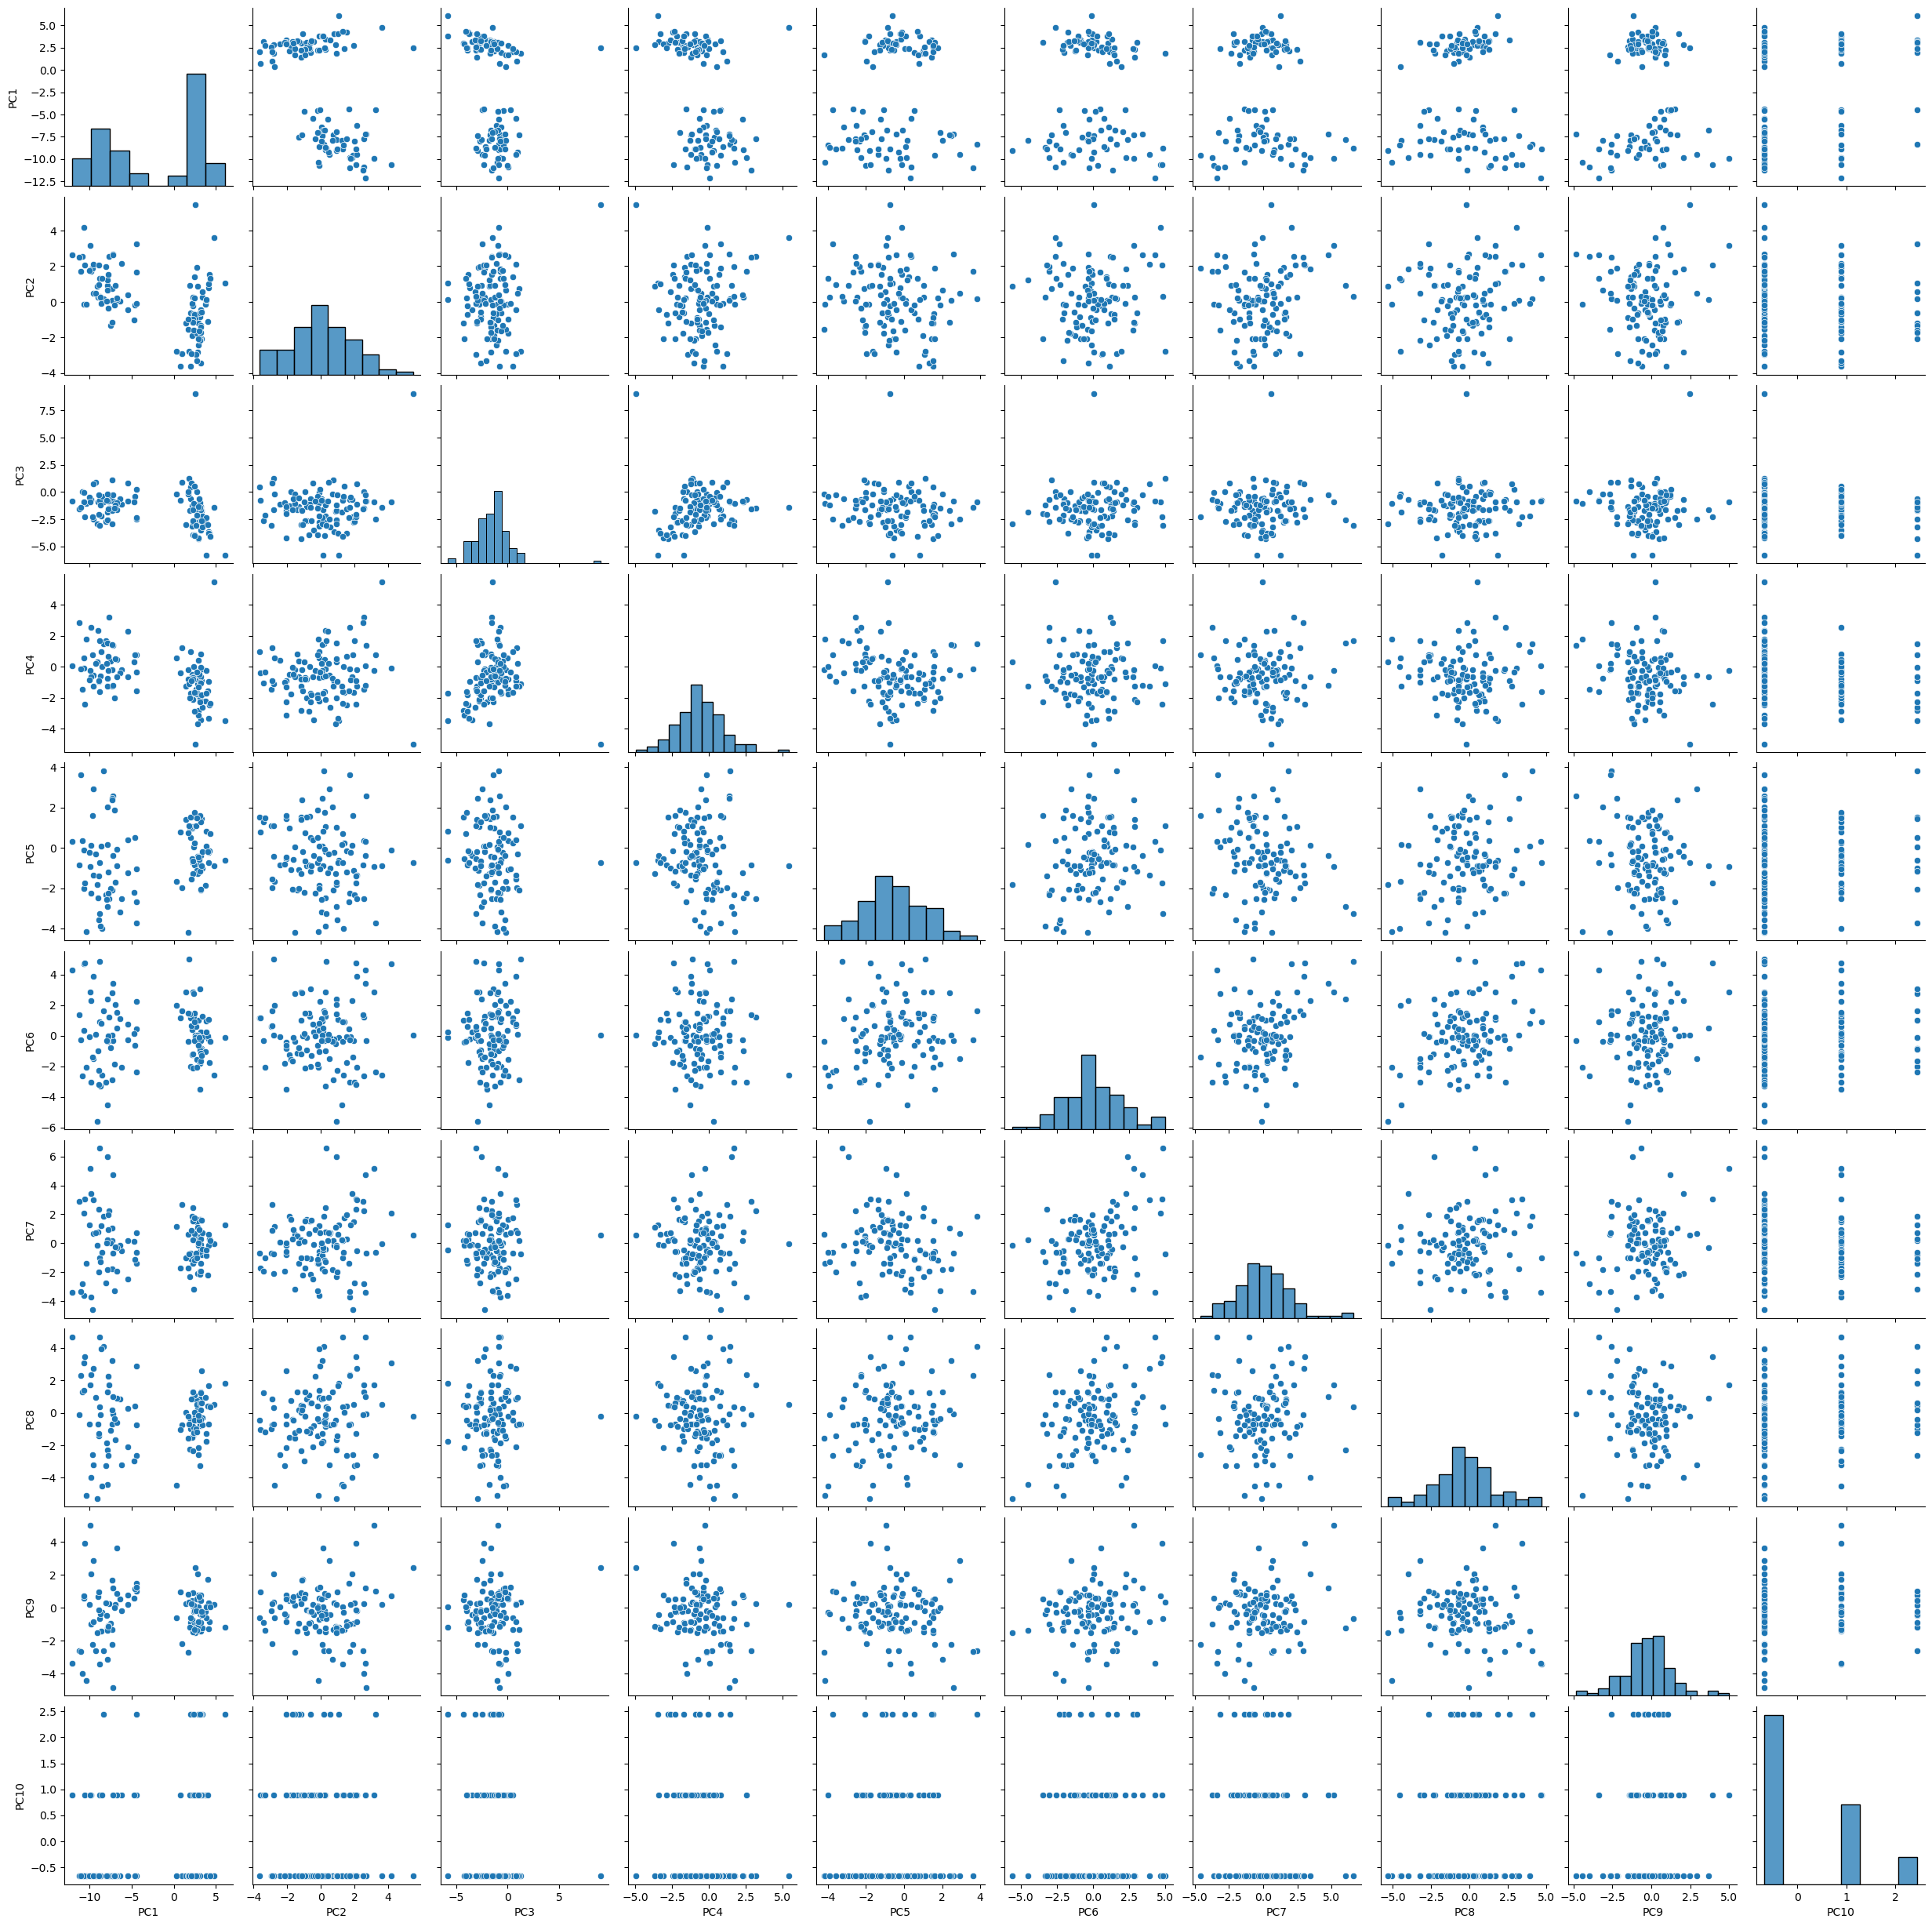

In [5]:
sns.pairplot(genetics1)

In [6]:
'''The "genetic_data_test.csv" file contains test data used to evaluate the trained model's predictive performance. 
It includes genetic information from 𝑁 = 111 individuals, with each row representing an individual and 
the columns containing the principal component values and the corresponding ancestry labels. 
The test dataset also includes individuals with "Unknown" ancestry, as well as individuals with 
Mexican and African American ancestry. 
The five individuals with "Unknown" ancestry belong to one of the five ancestries represented in the training set, while 
the Mexican and African American individuals have varying degrees of ancestral proportions due to historical mixing.'''

'The "genetic_data_test.csv" file contains test data used to evaluate the trained model\'s predictive performance. \nIt includes genetic information from 𝑁 = 111 individuals, with each row representing an individual and \nthe columns containing the principal component values and the corresponding ancestry labels. \nThe test dataset also includes individuals with "Unknown" ancestry, as well as individuals with \nMexican and African American ancestry. \nThe five individuals with "Unknown" ancestry belong to one of the five ancestries represented in the training set, while \nthe Mexican and African American individuals have varying degrees of ancestral proportions due to historical mixing.'

In [7]:
genetics2 = pd.read_csv('genetic_data_train.csv')

In [8]:
genetics2

PC1       PC2       PC3       PC4        PC5       PC6       PC7  \
0   -10.901171  0.798743 -1.143301 -1.070960  11.856396 -2.265965  4.536405   
1    -9.990054  1.416821 -0.729626 -0.443621  10.418594  0.443514  2.640659   
2    -9.345388  2.913054 -0.921421  0.029173  10.672615 -2.052552  5.140476   
3   -11.221507  1.733021 -2.339817  0.045786  13.195087 -3.068897  2.863434   
4   -10.175158  2.066307 -0.785493 -0.632400   7.461272 -1.643509  0.715258   
..         ...       ...       ...       ...        ...       ...       ...   
178   4.562678  1.595991 -6.255160 -3.083079   0.155693 -2.509439 -1.186470   
179   4.559052  1.581629 -5.121037 -4.312312   0.021703 -0.787173 -1.838054   
180   3.101335  1.477101 -5.759153 -2.083745  -0.750615  1.061579 -1.341655   
181   3.235086 -0.974829 -4.049595  0.020907  -0.489322  0.627622  0.087942   
182   4.972614  1.900830 -4.944774 -1.368755   0.538729 -0.045408  0.782997   

          PC8       PC9      PC10        Ancestry  
0    1.519959 -2.214294 -0.671274         African  
1   -4.637746  3.351629 -0.671274         African  
2   -1.451096  0.444183 -0.671274         African  
3   -2.259194  2.374566 -0.671274         African  
4   -3.982752  0.098681 -0.671274         African  
..        ...       ...       ...             ...  
178  0.641546  2.893239  0.885596  NativeAmerican  
179 -0.118590  1.200644  0.885596  NativeAmerican  
180 -0.215556 -0.133415  0.885596  NativeAmerican  
181  0.737715  3.262126  0.885596  NativeAmerican  
182 -0.370055  1.284957  2.442467  NativeAmerican  

[183 rows x 11 columns]

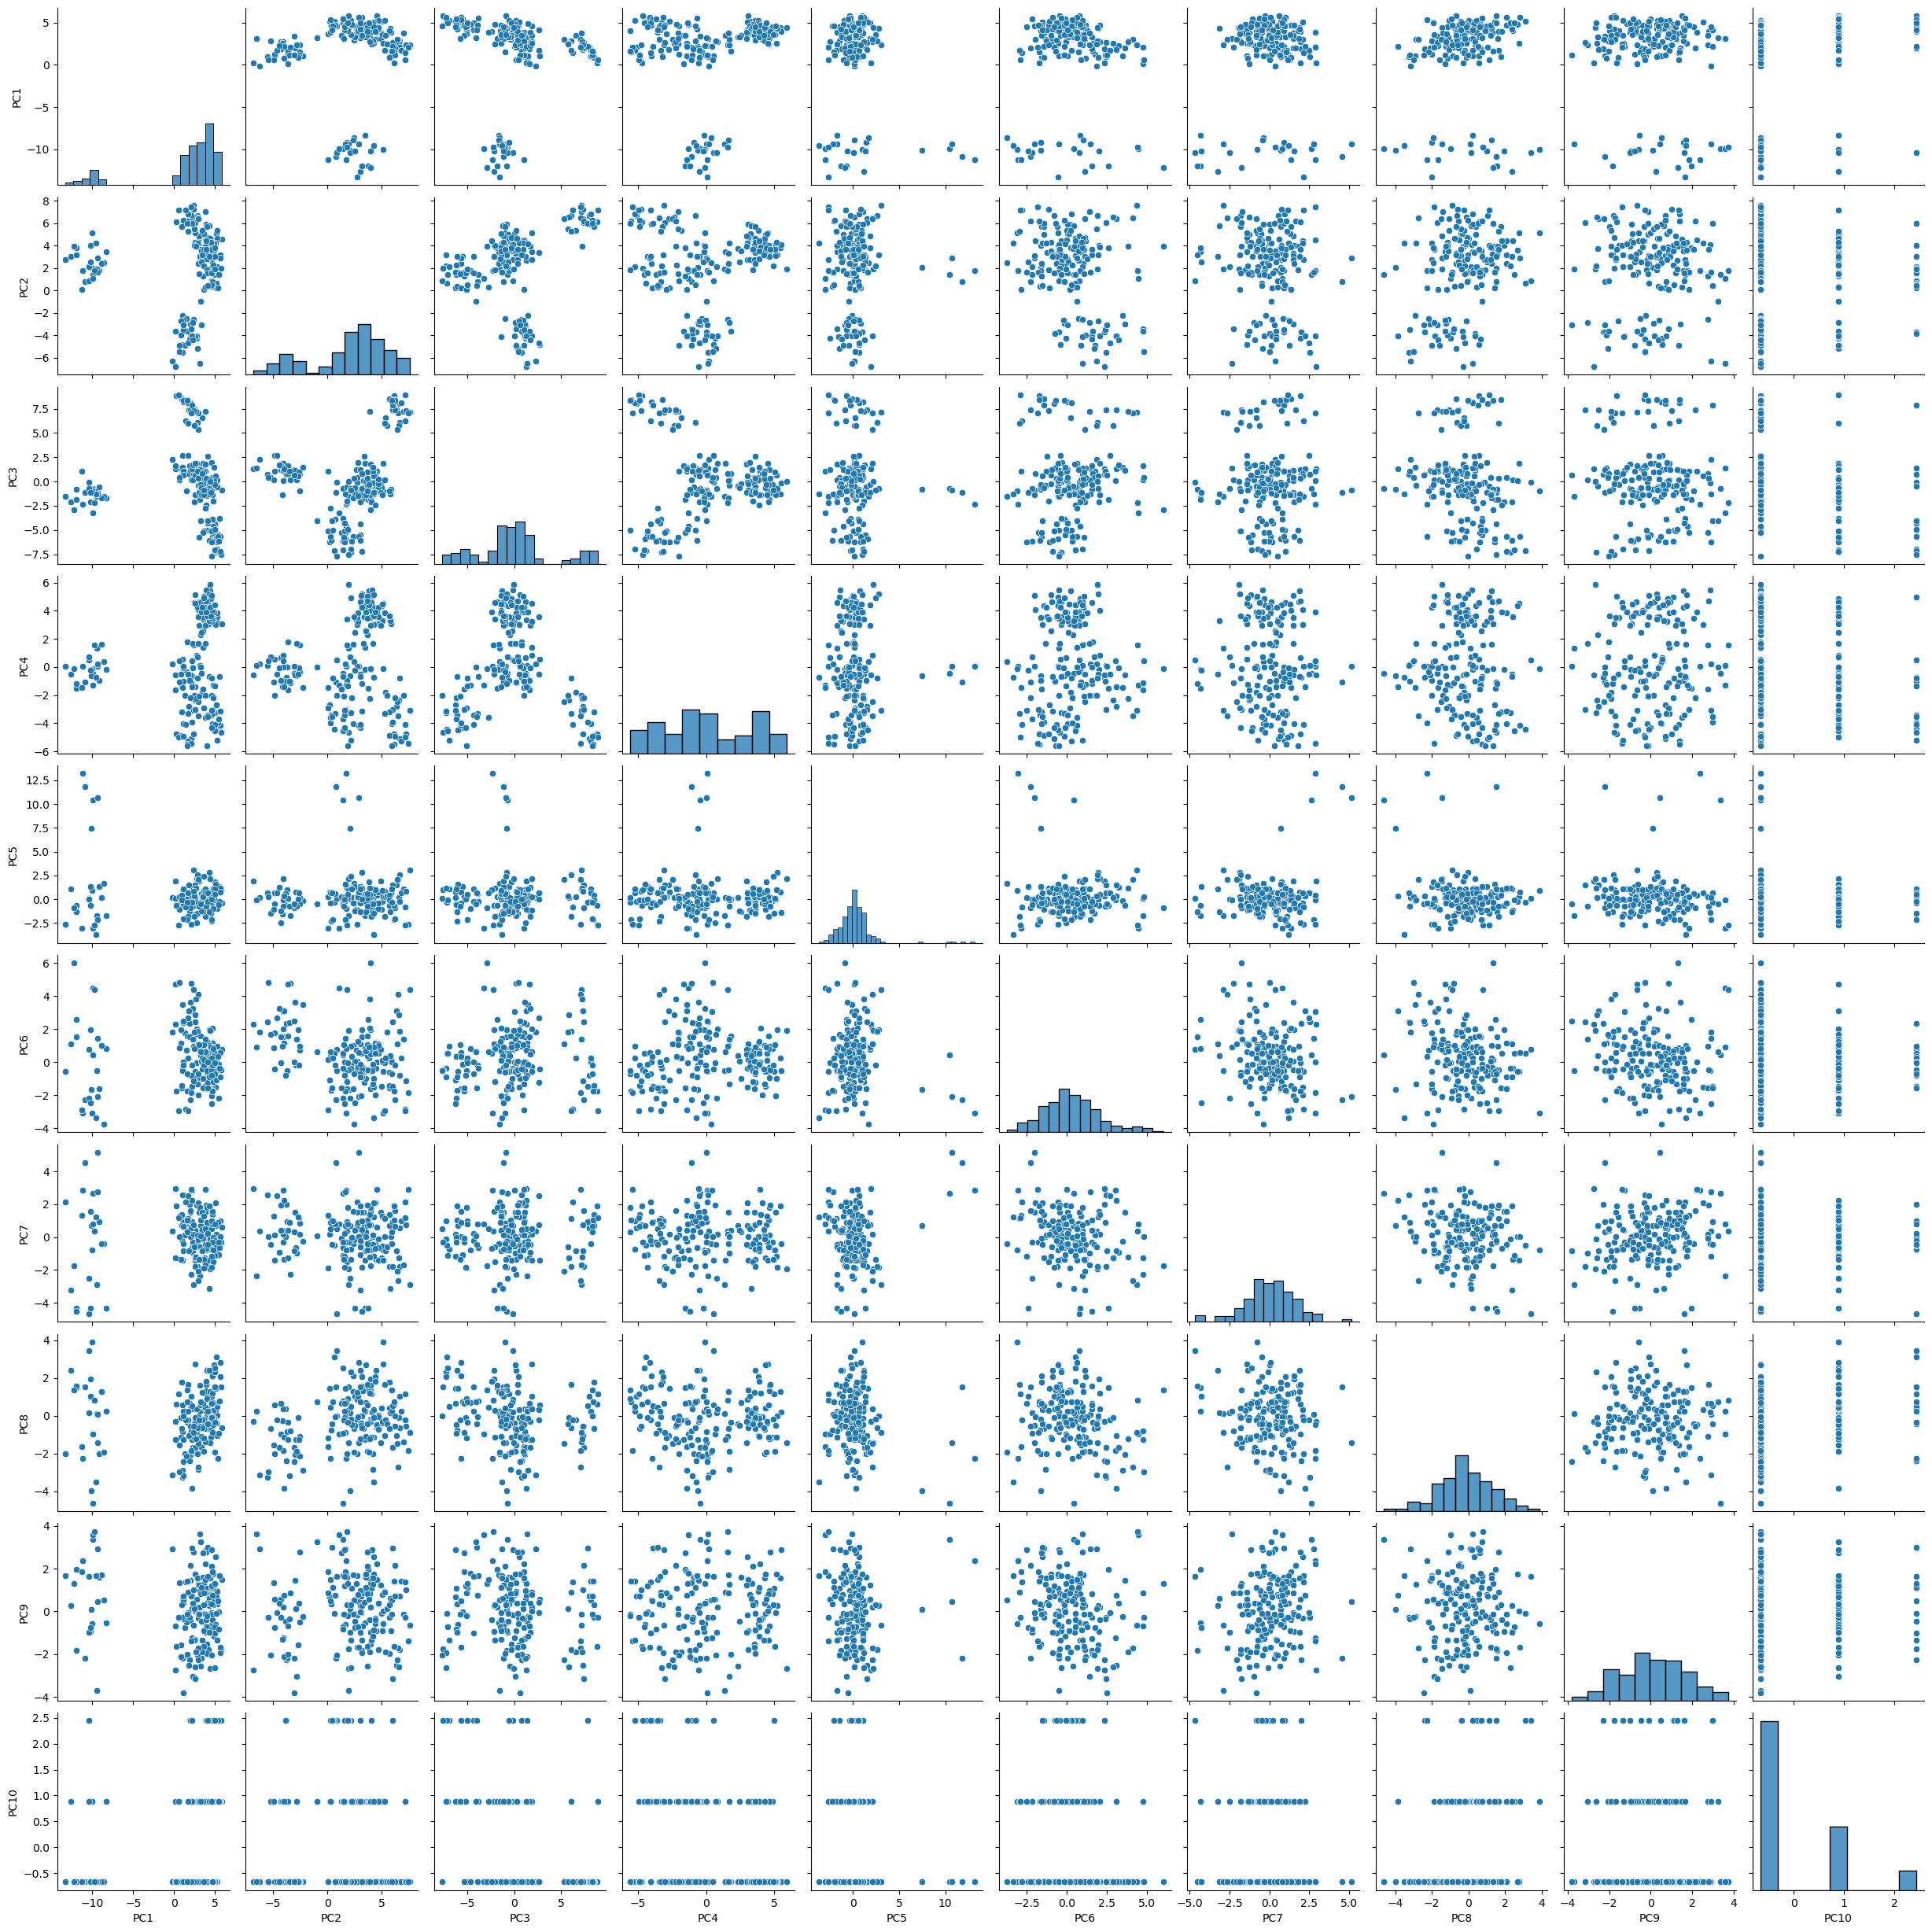

In [9]:
sns.pairplot(genetics2)

In [10]:
'''The "genetic_data_train.csv" file contains training data used to fit a model for predicting an individual's ancestry. 
It includes genetic information from 𝑁 = 183 individuals sampled from different populations worldwide. 
The genetic data has been projected onto 𝑝 = 10 top principal components (PC1 to PC10) 
that capture a significant proportion of the variance (0.2416). Each row represents an individual, and 
the columns contain the principal component values and the corresponding ancestry labels. 
The available ancestral categories are African, European, East Asian, Oceanian, and Native American.'''

'The "genetic_data_train.csv" file contains training data used to fit a model for predicting an individual\'s ancestry. \nIt includes genetic information from 𝑁 = 183 individuals sampled from different populations worldwide. \nThe genetic data has been projected onto 𝑝 = 10 top principal components (PC1 to PC10) \nthat capture a significant proportion of the variance (0.2416). Each row represents an individual, and \nthe columns contain the principal component values and the corresponding ancestry labels. \nThe available ancestral categories are African, European, East Asian, Oceanian, and Native American.'

# Merged Data

In [11]:
genetics = pd.merge(genetics2, genetics1, on = 'Ancestry', how = 'outer')

In [12]:
genetics

PC1_x     PC2_x     PC3_x     PC4_x      PC5_x     PC6_x     PC7_x  \
0   -10.901171  0.798743 -1.143301 -1.070960  11.856396 -2.265965  4.536405   
1    -9.990054  1.416821 -0.729626 -0.443621  10.418594  0.443514  2.640659   
2    -9.345388  2.913054 -0.921421  0.029173  10.672615 -2.052552  5.140476   
3   -11.221507  1.733021 -2.339817  0.045786  13.195087 -3.068897  2.863434   
4   -10.175158  2.066307 -0.785493 -0.632400   7.461272 -1.643509  0.715258   
..         ...       ...       ...       ...        ...       ...       ...   
289        NaN       NaN       NaN       NaN        NaN       NaN       NaN   
290        NaN       NaN       NaN       NaN        NaN       NaN       NaN   
291        NaN       NaN       NaN       NaN        NaN       NaN       NaN   
292        NaN       NaN       NaN       NaN        NaN       NaN       NaN   
293        NaN       NaN       NaN       NaN        NaN       NaN       NaN   

        PC8_x     PC9_x    PC10_x  ...      PC1_y     PC2_y     PC3_y  \
0    1.519959 -2.214294 -0.671274  ...        NaN       NaN       NaN   
1   -4.637746  3.351629 -0.671274  ...        NaN       NaN       NaN   
2   -1.451096  0.444183 -0.671274  ...        NaN       NaN       NaN   
3   -2.259194  2.374566 -0.671274  ...        NaN       NaN       NaN   
4   -3.982752  0.098681 -0.671274  ...        NaN       NaN       NaN   
..        ...       ...       ...  ...        ...       ...       ...   
289       NaN       NaN       NaN  ... -11.030349  1.712786 -1.392893   
290       NaN       NaN       NaN  ...  -7.994173  0.045333 -0.738547   
291       NaN       NaN       NaN  ...  -8.874531  2.074620 -2.060999   
292       NaN       NaN       NaN  ...  -7.017063 -0.199721 -1.469538   
293       NaN       NaN       NaN  ...  -5.488129  0.406477 -0.852392   

        PC4_y     PC5_y     PC6_y     PC7_y     PC8_y     PC9_y    PC10_y  
0         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
2         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
3         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
4         NaN       NaN       NaN       NaN       NaN       NaN       NaN  
..        ...       ...       ...       ...       ...       ...       ...  
289 -0.163989  3.623641 -0.263645 -3.337796  2.279226 -2.632659 -0.671274  
290  0.189793 -2.545140 -0.332066  0.026289 -1.840944 -0.456438 -0.671274  
291 -0.898143 -1.372896 -3.175091  2.325163 -1.256258 -0.133253 -0.671274  
292 -1.997714  1.892038 -1.880466 -3.278863 -0.336890  0.042410 -0.671274  
293  2.299789 -1.219706 -0.260295  0.204571  0.262224  0.802251 -0.671274  

[294 rows x 21 columns]

# Description

In [13]:
genetics.describe()

PC1_x       PC2_x       PC3_x       PC4_x       PC5_x       PC6_x  \
count  183.000000  183.000000  183.000000  183.000000  183.000000  183.000000   
mean     1.404880    2.022935    0.001913    0.102812    0.243929    0.293902   
std      4.912770    3.486088    3.919764    3.158607    2.146196    1.775345   
min    -13.319922   -6.790059   -7.682406   -5.578577   -3.738619   -3.750904   
25%      1.378429    0.693607   -1.670439   -2.218318   -0.689892   -0.778750   
50%      3.078680    2.891455   -0.216789   -0.158435    0.104254    0.166350   
75%      4.306548    4.258144    1.274309    3.276286    0.782704    1.127730   
max      5.811956    7.582173    8.938295    5.892653   13.195087    6.004057   

            PC7_x       PC8_x       PC9_x      PC10_x       PC1_y       PC2_y  \
count  183.000000  183.000000  183.000000  183.000000  111.000000  111.000000   
mean     0.043762   -0.185769    0.103880   -0.041720   -2.428559    0.067684   
std      1.590285    1.508038    1.585749    0.979746    5.711764    1.785841   
min     -4.658872   -4.637746   -3.805225   -0.671274  -12.099310   -3.626565   
25%     -0.814203   -1.150829   -0.961702   -0.671274   -7.940556   -1.150346   
50%      0.087942   -0.179818    0.127011   -0.671274    1.016945    0.085142   
75%      0.975648    0.733770    1.233731    0.885596    2.881532    1.306610   
max      5.140476    3.908339    3.739434    2.442467    6.077012    5.464283   

            PC3_y       PC4_y       PC5_y       PC6_y       PC7_y       PC8_y  \
count  111.000000  111.000000  111.000000  111.000000  111.000000  111.000000   
mean    -1.493551   -0.573465   -0.523544    0.063552    0.002549   -0.271733   
std      1.737356    1.570952    1.684093    1.998561    1.961055    2.005613   
min     -5.796923   -4.965928   -4.193899   -5.595230   -4.611258   -5.298648   
25%     -2.585205   -1.589435   -1.678536   -1.169095   -1.127837   -1.276366   
50%     -1.392893   -0.659949   -0.639072   -0.084256   -0.062762   -0.336890   
75%     -0.714361    0.291034    0.614935    1.178394    1.069038    0.869861   
max      9.067873    5.459907    3.830077    4.979169    6.567931    4.683556   

            PC9_y      PC10_y  
count  111.000000  111.000000  
mean    -0.301580    0.086122  
std      1.571386    1.046801  
min     -4.827428   -0.671274  
25%     -1.182661   -0.671274  
50%     -0.217657   -0.671274  
75%      0.554207    0.885596  
max      5.002221    2.442467

# Information

In [14]:
genetics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PC1_x     183 non-null    float64
 1   PC2_x     183 non-null    float64
 2   PC3_x     183 non-null    float64
 3   PC4_x     183 non-null    float64
 4   PC5_x     183 non-null    float64
 5   PC6_x     183 non-null    float64
 6   PC7_x     183 non-null    float64
 7   PC8_x     183 non-null    float64
 8   PC9_x     183 non-null    float64
 9   PC10_x    183 non-null    float64
 10  Ancestry  294 non-null    object 
 11  PC1_y     111 non-null    float64
 12  PC2_y     111 non-null    float64
 13  PC3_y     111 non-null    float64
 14  PC4_y     111 non-null    float64
 15  PC5_y     111 non-null    float64
 16  PC6_y     111 non-null    float64
 17  PC7_y     111 non-null    float64
 18  PC8_y     111 non-null    float64
 19  PC9_y     111 non-null    float64
 20  PC10_y    111 non-null    float6

# Null Values

In [15]:
genetics.isnull().sum()

PC1_x       111
PC2_x       111
PC3_x       111
PC4_x       111
PC5_x       111
PC6_x       111
PC7_x       111
PC8_x       111
PC9_x       111
PC10_x      111
Ancestry      0
PC1_y       183
PC2_y       183
PC3_y       183
PC4_y       183
PC5_y       183
PC6_y       183
PC7_y       183
PC8_y       183
PC9_y       183
PC10_y      183
dtype: int64

In [16]:
genetics.fillna(method = 'ffill', inplace = True)

In [17]:
genetics.isnull().sum()

PC1_x         0
PC2_x         0
PC3_x         0
PC4_x         0
PC5_x         0
PC6_x         0
PC7_x         0
PC8_x         0
PC9_x         0
PC10_x        0
Ancestry      0
PC1_y       183
PC2_y       183
PC3_y       183
PC4_y       183
PC5_y       183
PC6_y       183
PC7_y       183
PC8_y       183
PC9_y       183
PC10_y      183
dtype: int64

In [18]:
genetics.fillna(method = 'bfill', inplace = True)

In [19]:
genetics.isnull().sum()

PC1_x       0
PC2_x       0
PC3_x       0
PC4_x       0
PC5_x       0
PC6_x       0
PC7_x       0
PC8_x       0
PC9_x       0
PC10_x      0
Ancestry    0
PC1_y       0
PC2_y       0
PC3_y       0
PC4_y       0
PC5_y       0
PC6_y       0
PC7_y       0
PC8_y       0
PC9_y       0
PC10_y      0
dtype: int64

In [20]:
genetics

PC1_x     PC2_x     PC3_x     PC4_x      PC5_x     PC6_x     PC7_x  \
0   -10.901171  0.798743 -1.143301 -1.070960  11.856396 -2.265965  4.536405   
1    -9.990054  1.416821 -0.729626 -0.443621  10.418594  0.443514  2.640659   
2    -9.345388  2.913054 -0.921421  0.029173  10.672615 -2.052552  5.140476   
3   -11.221507  1.733021 -2.339817  0.045786  13.195087 -3.068897  2.863434   
4   -10.175158  2.066307 -0.785493 -0.632400   7.461272 -1.643509  0.715258   
..         ...       ...       ...       ...        ...       ...       ...   
289   4.972614  1.900830 -4.944774 -1.368755   0.538729 -0.045408  0.782997   
290   4.972614  1.900830 -4.944774 -1.368755   0.538729 -0.045408  0.782997   
291   4.972614  1.900830 -4.944774 -1.368755   0.538729 -0.045408  0.782997   
292   4.972614  1.900830 -4.944774 -1.368755   0.538729 -0.045408  0.782997   
293   4.972614  1.900830 -4.944774 -1.368755   0.538729 -0.045408  0.782997   

        PC8_x     PC9_x    PC10_x  ...      PC1_y     PC2_y     PC3_y  \
0    1.519959 -2.214294 -0.671274  ...   2.517683  5.464283  9.067873   
1   -4.637746  3.351629 -0.671274  ...   2.517683  5.464283  9.067873   
2   -1.451096  0.444183 -0.671274  ...   2.517683  5.464283  9.067873   
3   -2.259194  2.374566 -0.671274  ...   2.517683  5.464283  9.067873   
4   -3.982752  0.098681 -0.671274  ...   2.517683  5.464283  9.067873   
..        ...       ...       ...  ...        ...       ...       ...   
289 -0.370055  1.284957  2.442467  ... -11.030349  1.712786 -1.392893   
290 -0.370055  1.284957  2.442467  ...  -7.994173  0.045333 -0.738547   
291 -0.370055  1.284957  2.442467  ...  -8.874531  2.074620 -2.060999   
292 -0.370055  1.284957  2.442467  ...  -7.017063 -0.199721 -1.469538   
293 -0.370055  1.284957  2.442467  ...  -5.488129  0.406477 -0.852392   

        PC4_y     PC5_y     PC6_y     PC7_y     PC8_y     PC9_y    PC10_y  
0   -4.965928 -0.741937  0.039785  0.573279 -0.216918  2.454823 -0.671274  
1   -4.965928 -0.741937  0.039785  0.573279 -0.216918  2.454823 -0.671274  
2   -4.965928 -0.741937  0.039785  0.573279 -0.216918  2.454823 -0.671274  
3   -4.965928 -0.741937  0.039785  0.573279 -0.216918  2.454823 -0.671274  
4   -4.965928 -0.741937  0.039785  0.573279 -0.216918  2.454823 -0.671274  
..        ...       ...       ...       ...       ...       ...       ...  
289 -0.163989  3.623641 -0.263645 -3.337796  2.279226 -2.632659 -0.671274  
290  0.189793 -2.545140 -0.332066  0.026289 -1.840944 -0.456438 -0.671274  
291 -0.898143 -1.372896 -3.175091  2.325163 -1.256258 -0.133253 -0.671274  
292 -1.997714  1.892038 -1.880466 -3.278863 -0.336890  0.042410 -0.671274  
293  2.299789 -1.219706 -0.260295  0.204571  0.262224  0.802251 -0.671274  

[294 rows x 21 columns]

# Columns

In [21]:
genetics.columns

Index(['PC1_x', 'PC2_x', 'PC3_x', 'PC4_x', 'PC5_x', 'PC6_x', 'PC7_x', 'PC8_x',
       'PC9_x', 'PC10_x', 'Ancestry', 'PC1_y', 'PC2_y', 'PC3_y', 'PC4_y',
       'PC5_y', 'PC6_y', 'PC7_y', 'PC8_y', 'PC9_y', 'PC10_y'],
      dtype='object')

# Unique

In [22]:
genetics['Ancestry'].unique()

array(['African', 'European', 'EastAsian', 'Oceanian', 'NativeAmerican',
       'Unknown', 'Mexican', 'AfricanAmerican'], dtype=object)

# Histogram

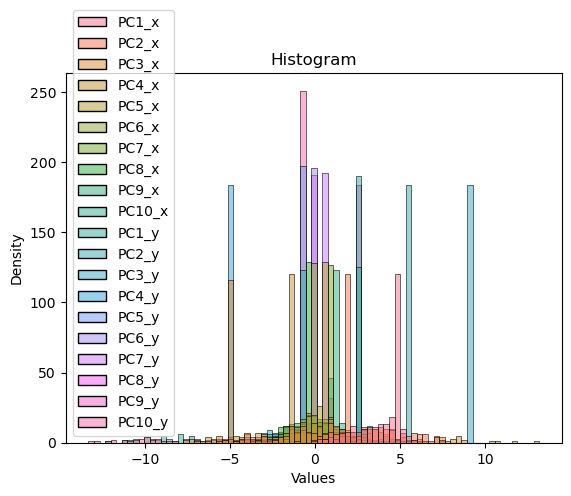

In [23]:
a = sns.histplot(genetics, kde = False, color = 'skyblue')
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()

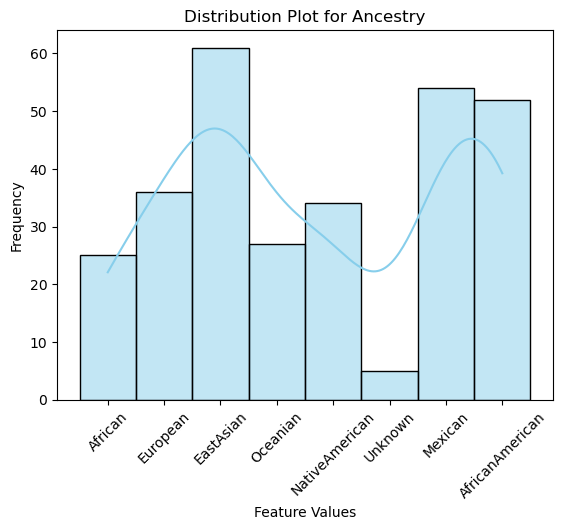

In [24]:
sns.histplot(genetics['Ancestry'], kde=True, color='skyblue')
plt.title('Distribution Plot for Ancestry')
plt.xlabel('Feature Values')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

<Axes: >

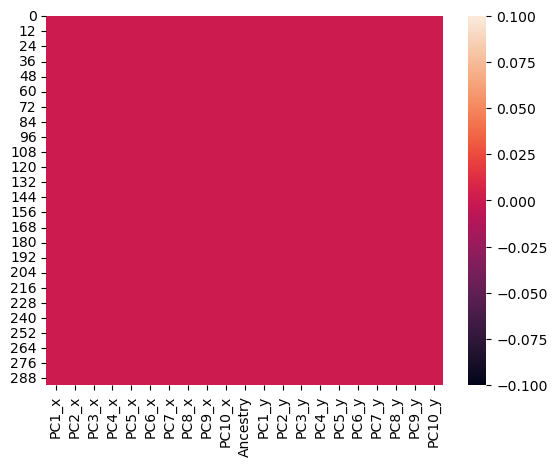

In [25]:
sns.heatmap(genetics.isnull())

# Duplicate Values

In [26]:
duplicates_x = genetics[genetics.duplicated('PC1_x', keep=False)]

In [27]:
duplicates_x

PC1_x    PC2_x     PC3_x     PC4_x     PC5_x     PC6_x     PC7_x  \
182  4.972614  1.90083 -4.944774 -1.368755  0.538729 -0.045408  0.782997   
183  4.972614  1.90083 -4.944774 -1.368755  0.538729 -0.045408  0.782997   
184  4.972614  1.90083 -4.944774 -1.368755  0.538729 -0.045408  0.782997   
185  4.972614  1.90083 -4.944774 -1.368755  0.538729 -0.045408  0.782997   
186  4.972614  1.90083 -4.944774 -1.368755  0.538729 -0.045408  0.782997   
..        ...      ...       ...       ...       ...       ...       ...   
289  4.972614  1.90083 -4.944774 -1.368755  0.538729 -0.045408  0.782997   
290  4.972614  1.90083 -4.944774 -1.368755  0.538729 -0.045408  0.782997   
291  4.972614  1.90083 -4.944774 -1.368755  0.538729 -0.045408  0.782997   
292  4.972614  1.90083 -4.944774 -1.368755  0.538729 -0.045408  0.782997   
293  4.972614  1.90083 -4.944774 -1.368755  0.538729 -0.045408  0.782997   

        PC8_x     PC9_x    PC10_x  ...      PC1_y     PC2_y     PC3_y  \
182 -0.370055  1.284957  2.442467  ...   2.517683  5.464283  9.067873   
183 -0.370055  1.284957  2.442467  ...   2.517683  5.464283  9.067873   
184 -0.370055  1.284957  2.442467  ...   6.077012  1.032867 -5.795883   
185 -0.370055  1.284957  2.442467  ...   1.016945 -2.913299  0.907702   
186 -0.370055  1.284957  2.442467  ... -10.860926  2.545077  0.023950   
..        ...       ...       ...  ...        ...       ...       ...   
289 -0.370055  1.284957  2.442467  ... -11.030349  1.712786 -1.392893   
290 -0.370055  1.284957  2.442467  ...  -7.994173  0.045333 -0.738547   
291 -0.370055  1.284957  2.442467  ...  -8.874531  2.074620 -2.060999   
292 -0.370055  1.284957  2.442467  ...  -7.017063 -0.199721 -1.469538   
293 -0.370055  1.284957  2.442467  ...  -5.488129  0.406477 -0.852392   

        PC4_y     PC5_y     PC6_y     PC7_y     PC8_y     PC9_y    PC10_y  
182 -4.965928 -0.741937  0.039785  0.573279 -0.216918  2.454823 -0.671274  
183 -4.965928 -0.741937  0.039785  0.573279 -0.216918  2.454823 -0.671274  
184 -3.490064 -0.600204 -0.120803  1.243767  1.821390 -1.173053  2.442467  
185  1.233580 -1.983452  1.605964  2.674998 -0.732921 -2.157438 -0.671274  
186 -1.474450  0.372286 -2.609954 -2.794092  1.264747 -3.974644 -0.671274  
..        ...       ...       ...       ...       ...       ...       ...  
289 -0.163989  3.623641 -0.263645 -3.337796  2.279226 -2.632659 -0.671274  
290  0.189793 -2.545140 -0.332066  0.026289 -1.840944 -0.456438 -0.671274  
291 -0.898143 -1.372896 -3.175091  2.325163 -1.256258 -0.133253 -0.671274  
292 -1.997714  1.892038 -1.880466 -3.278863 -0.336890  0.042410 -0.671274  
293  2.299789 -1.219706 -0.260295  0.204571  0.262224  0.802251 -0.671274  

[112 rows x 21 columns]

In [28]:
duplicates_y = genetics[genetics.duplicated('PC1_y', keep=False)]
duplicates_y

PC1_x     PC2_x     PC3_x     PC4_x      PC5_x     PC6_x     PC7_x  \
0   -10.901171  0.798743 -1.143301 -1.070960  11.856396 -2.265965  4.536405   
1    -9.990054  1.416821 -0.729626 -0.443621  10.418594  0.443514  2.640659   
2    -9.345388  2.913054 -0.921421  0.029173  10.672615 -2.052552  5.140476   
3   -11.221507  1.733021 -2.339817  0.045786  13.195087 -3.068897  2.863434   
4   -10.175158  2.066307 -0.785493 -0.632400   7.461272 -1.643509  0.715258   
..         ...       ...       ...       ...        ...       ...       ...   
179   4.559052  1.581629 -5.121037 -4.312312   0.021703 -0.787173 -1.838054   
180   3.101335  1.477101 -5.759153 -2.083745  -0.750615  1.061579 -1.341655   
181   3.235086 -0.974829 -4.049595  0.020907  -0.489322  0.627622  0.087942   
182   4.972614  1.900830 -4.944774 -1.368755   0.538729 -0.045408  0.782997   
183   4.972614  1.900830 -4.944774 -1.368755   0.538729 -0.045408  0.782997   

        PC8_x     PC9_x    PC10_x  ...     PC1_y     PC2_y     PC3_y  \
0    1.519959 -2.214294 -0.671274  ...  2.517683  5.464283  9.067873   
1   -4.637746  3.351629 -0.671274  ...  2.517683  5.464283  9.067873   
2   -1.451096  0.444183 -0.671274  ...  2.517683  5.464283  9.067873   
3   -2.259194  2.374566 -0.671274  ...  2.517683  5.464283  9.067873   
4   -3.982752  0.098681 -0.671274  ...  2.517683  5.464283  9.067873   
..        ...       ...       ...  ...       ...       ...       ...   
179 -0.118590  1.200644  0.885596  ...  2.517683  5.464283  9.067873   
180 -0.215556 -0.133415  0.885596  ...  2.517683  5.464283  9.067873   
181  0.737715  3.262126  0.885596  ...  2.517683  5.464283  9.067873   
182 -0.370055  1.284957  2.442467  ...  2.517683  5.464283  9.067873   
183 -0.370055  1.284957  2.442467  ...  2.517683  5.464283  9.067873   

        PC4_y     PC5_y     PC6_y     PC7_y     PC8_y     PC9_y    PC10_y  
0   -4.965928 -0.741937  0.039785  0.573279 -0.216918  2.454823 -0.671274  
1   -4.965928 -0.741937  0.039785  0.573279 -0.216918  2.454823 -0.671274  
2   -4.965928 -0.741937  0.039785  0.573279 -0.216918  2.454823 -0.671274  
3   -4.965928 -0.741937  0.039785  0.573279 -0.216918  2.454823 -0.671274  
4   -4.965928 -0.741937  0.039785  0.573279 -0.216918  2.454823 -0.671274  
..        ...       ...       ...       ...       ...       ...       ...  
179 -4.965928 -0.741937  0.039785  0.573279 -0.216918  2.454823 -0.671274  
180 -4.965928 -0.741937  0.039785  0.573279 -0.216918  2.454823 -0.671274  
181 -4.965928 -0.741937  0.039785  0.573279 -0.216918  2.454823 -0.671274  
182 -4.965928 -0.741937  0.039785  0.573279 -0.216918  2.454823 -0.671274  
183 -4.965928 -0.741937  0.039785  0.573279 -0.216918  2.454823 -0.671274  

[184 rows x 21 columns]

In [29]:
count_dup_x = duplicates_x['PC2_x'].value_counts()

In [30]:
count_dup_x

PC2_x
1.90083    112
Name: count, dtype: int64

In [31]:
count_dup_y = duplicates_y['PC2_y'].value_counts()

In [32]:
count_dup_y

PC2_y
5.464283    184
Name: count, dtype: int64

# Pie Chart

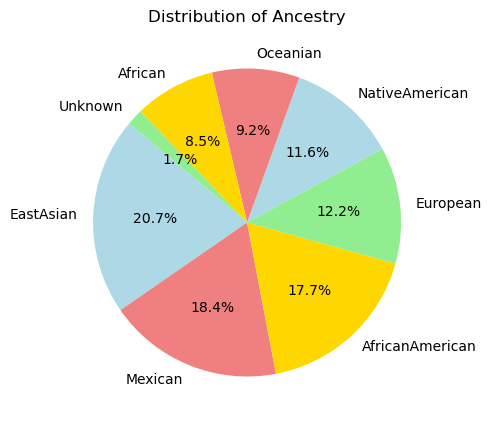

In [33]:
count_ancestry = genetics['Ancestry'].value_counts()


labels = count_ancestry.index
sizes = count_ancestry.values
colors = ['lightblue', 'lightcoral', 'gold', 'lightgreen']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Ancestry')
plt.show()

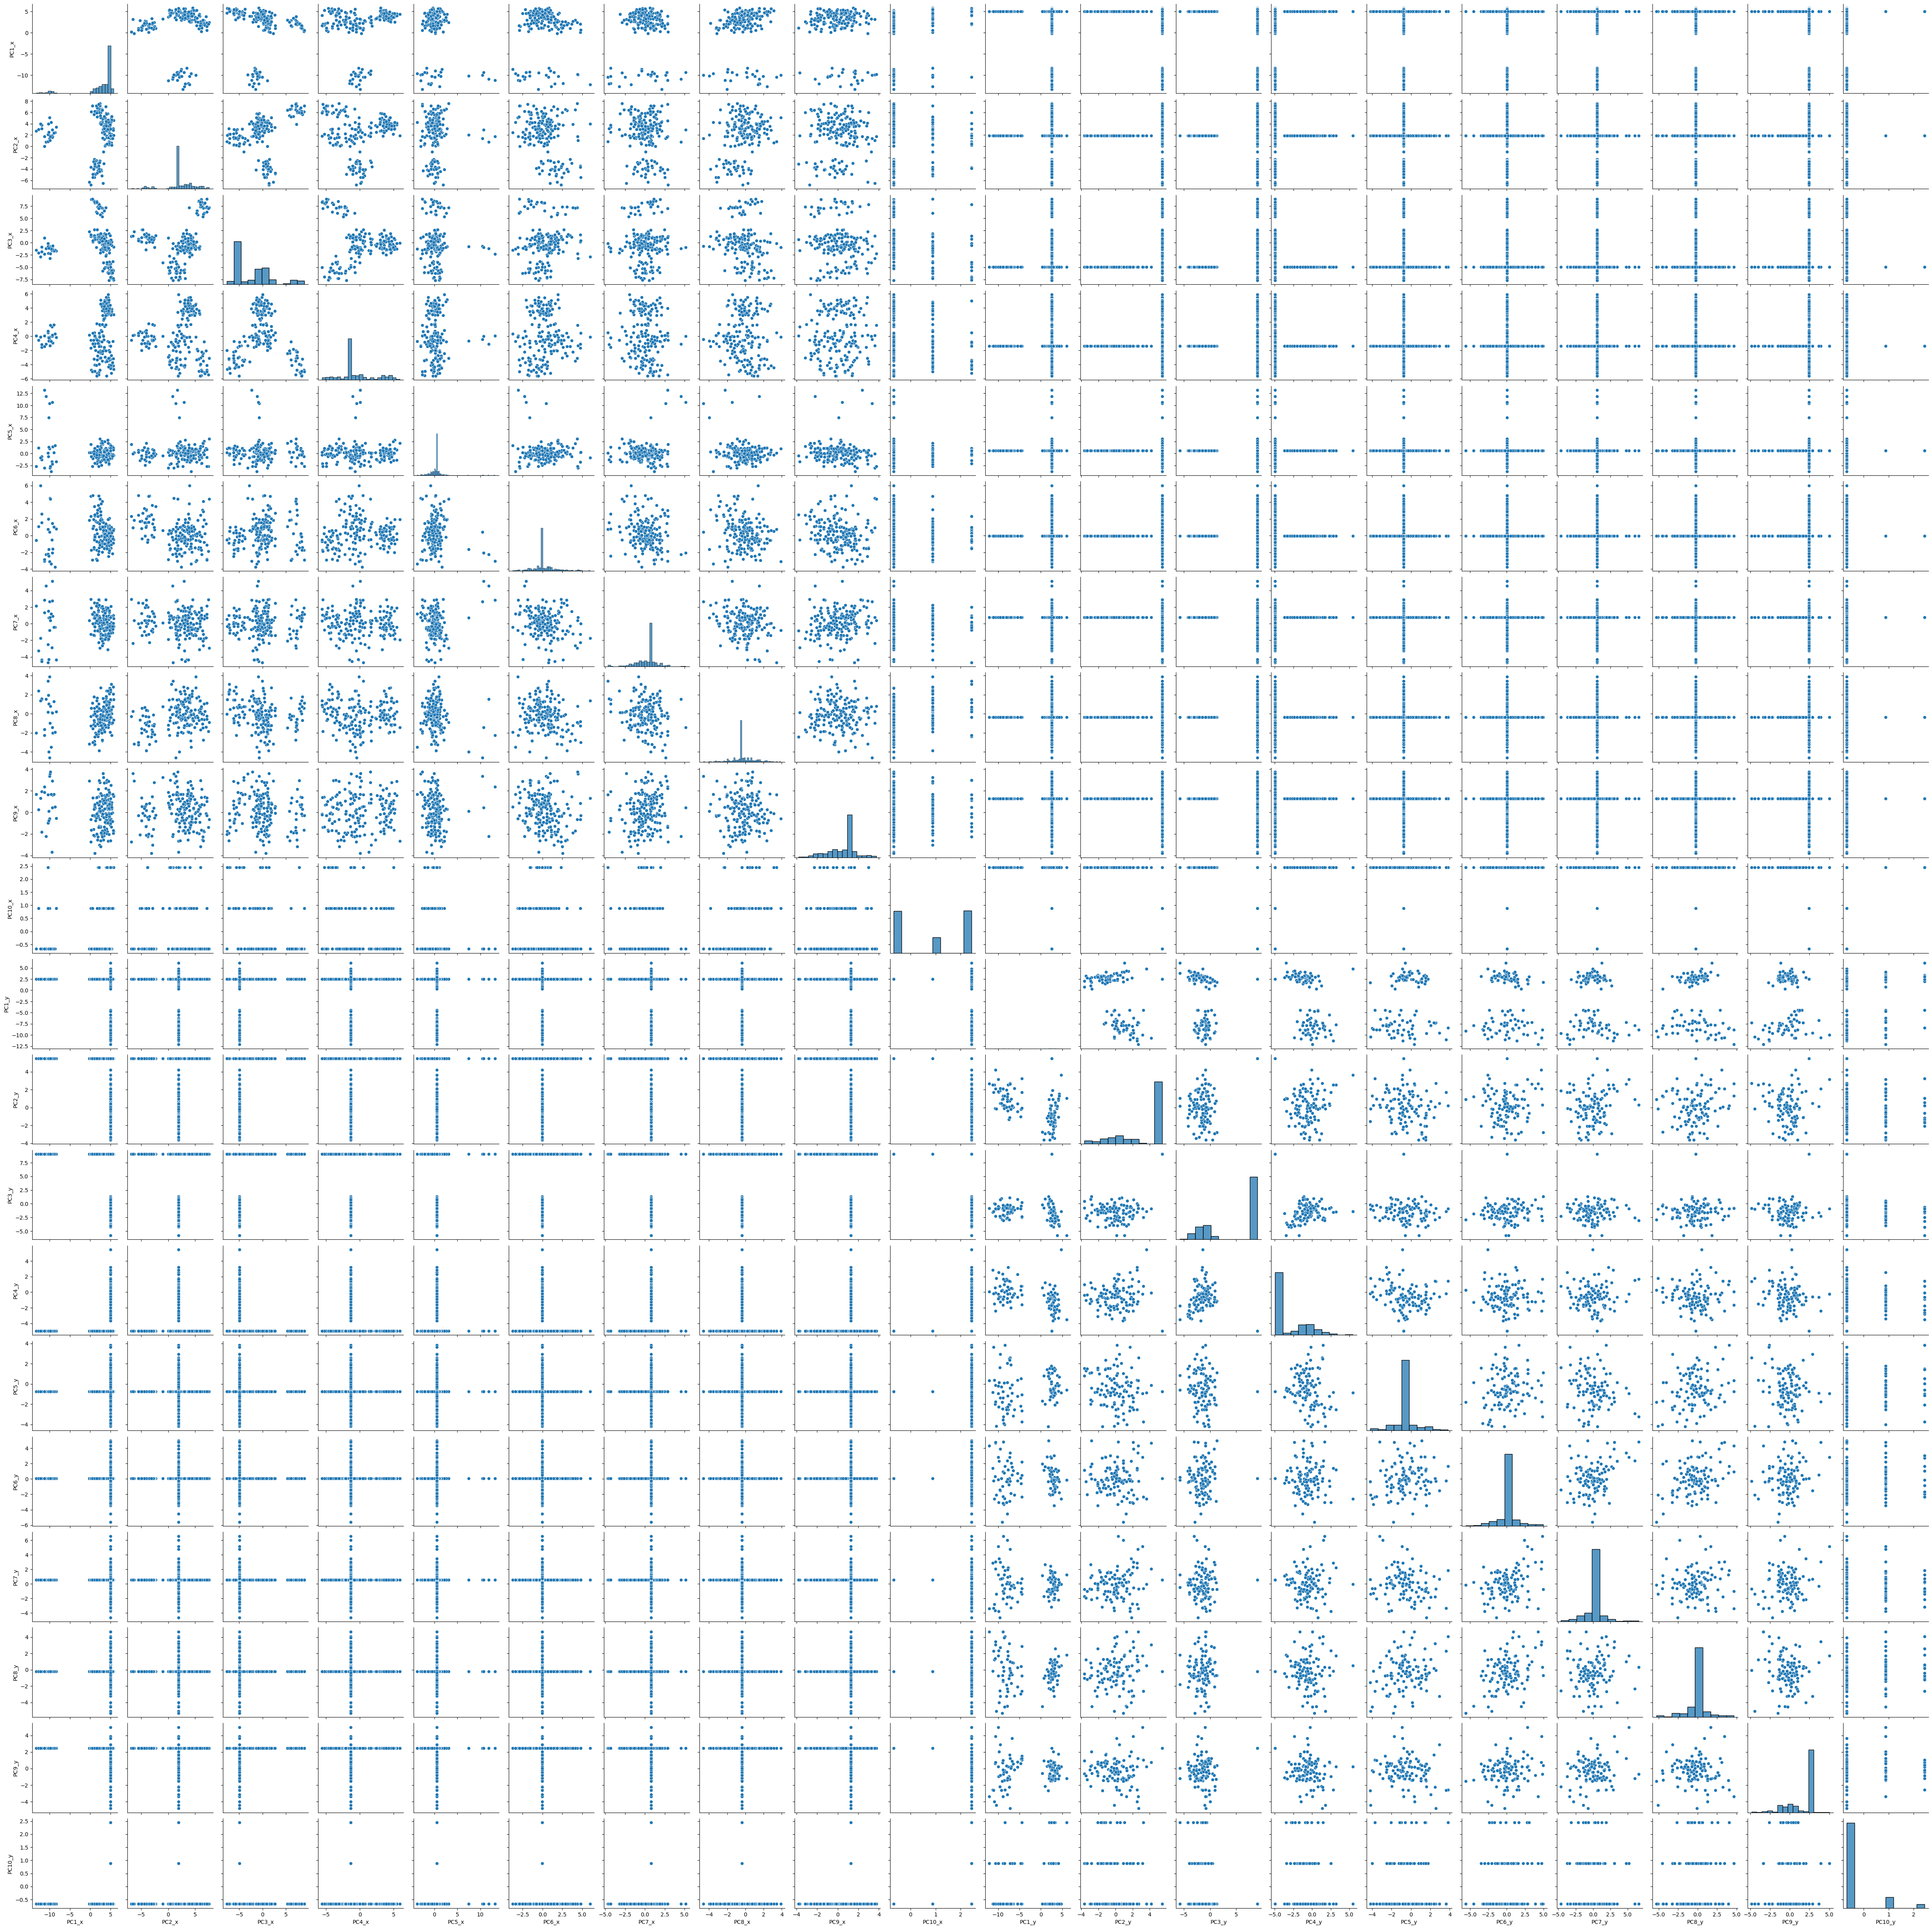

In [34]:
sns.pairplot(genetics)

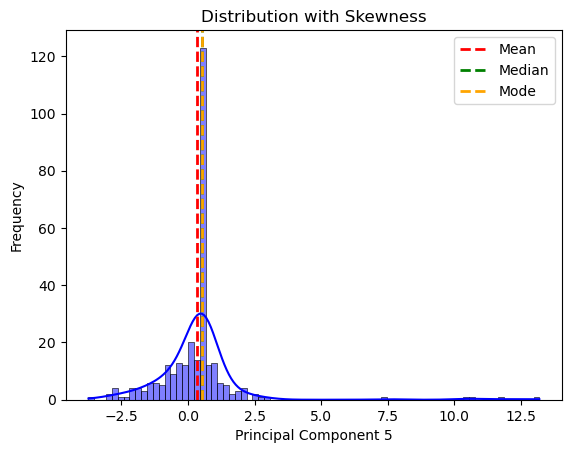

In [35]:
sns.histplot(genetics['PC5_x'], kde=True, color='blue')

plt.axvline(genetics['PC5_x'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(genetics['PC5_x'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(genetics['PC5_x'].mode()[0], color='orange', linestyle='dashed', linewidth=2, label='Mode')

plt.xlabel('Principal Component 5')
plt.ylabel('Frequency')
plt.title('Distribution with Skewness')
plt.legend()

plt.show()

Original Skewness: 2.016185576637219
Skewness after Log Transformation: -1.1713695592583453


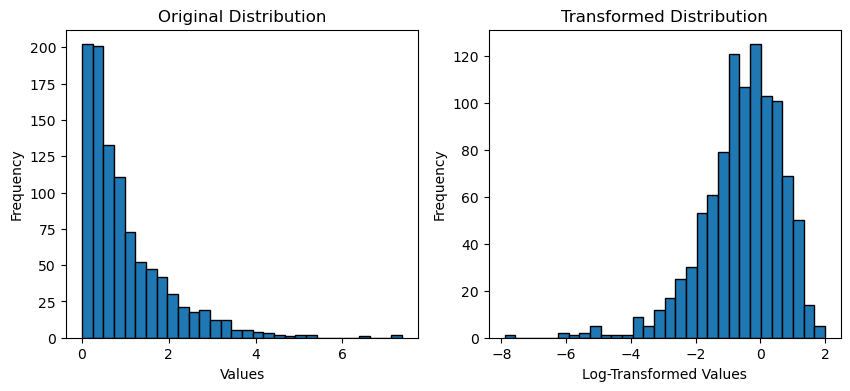

In [36]:
data = np.random.exponential(size=1000)  

original_skewness = np.mean((data - np.mean(data))**3) / np.std(data)**3
print(f'Original Skewness: {original_skewness}')

transformed_data = np.log(data)

transformed_skewness = np.mean((transformed_data - np.mean(transformed_data))**3) / np.std(transformed_data)**3
print(f'Skewness after Log Transformation: {transformed_skewness}')

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(data, bins=30, edgecolor='black')
plt.title('Original Distribution')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=30, edgecolor='black')
plt.title('Transformed Distribution')
plt.xlabel('Log-Transformed Values')
plt.ylabel('Frequency')

plt.show()

In [37]:
Q1 = genetics['PC5_x'].quantile(0.25)
Q3 = genetics['PC5_x'].quantile(0.75)

IQR = Q3 - Q1

threshold = 1.5

df_no_outliers = genetics[(genetics['PC5_x'] >= (Q1 - threshold * IQR)) & (genetics['PC5_x'] <= (Q3 + threshold * IQR))]

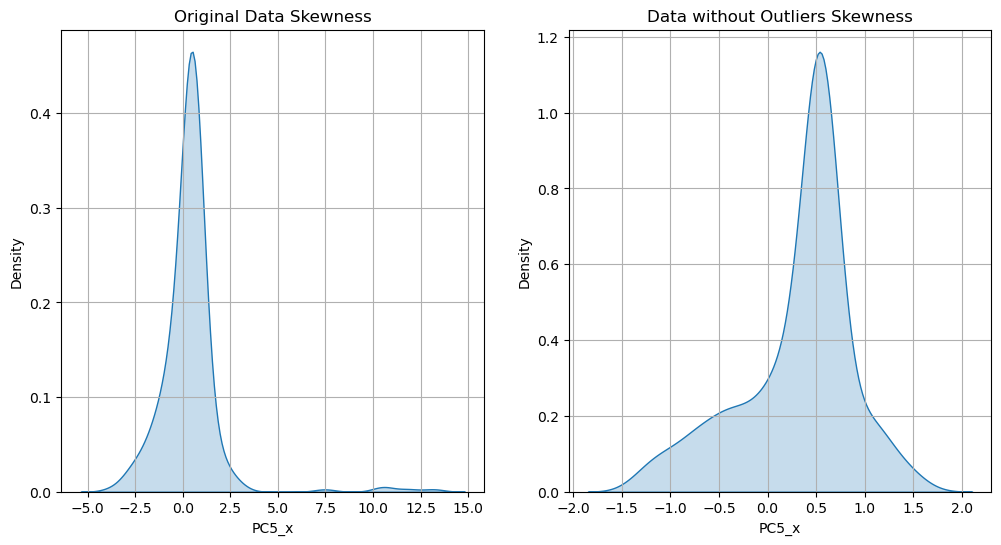

In [38]:
data = {'PC5_x': np.concatenate([np.random.exponential(size=800), np.random.uniform(low=20, high=50, size=200)])}
df = pd.DataFrame(data)

Q1 = genetics['PC5_x'].quantile(0.25)
Q3 = genetics['PC5_x'].quantile(0.75)
IQR = Q3 - Q1

threshold = 1.5

df_no_outliers = genetics[(genetics['PC5_x'] >= (Q1 - threshold * IQR)) & (genetics['PC5_x'] <= (Q3 + threshold * IQR))]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(genetics['PC5_x'], fill=True)
plt.title("Original Data Skewness")
plt.grid()

plt.subplot(1, 2, 2)
sns.kdeplot(df_no_outliers['PC5_x'], fill=True)
plt.title("Data without Outliers Skewness")

plt.grid()
plt.show()

# Load or Generate Data

In [39]:
y = genetics['Ancestry']
x = genetics.drop(['Ancestry'], axis = 1)

# Split Data into Training and Testing Set

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 42)

# Create a Logistic Regression Model

In [41]:
log = LogisticRegression()

# Train the Model

In [42]:
log.fit(x_train, y_train)

LogisticRegression()

# Training and Testing Score

In [43]:
print(f'Training Score : {log.score(x_train, y_train)}')
print(f'Testing Score : {log.score(x_test, y_test)}')

Training Score : 0.9914893617021276
Testing Score : 0.9830508474576272


In [44]:
y_pred = log.predict(x_test)

In [45]:
y_pred

array(['European', 'African', 'Oceanian', 'AfricanAmerican',
       'AfricanAmerican', 'Oceanian', 'EastAsian', 'Mexican', 'EastAsian',
       'European', 'EastAsian', 'European', 'NativeAmerican', 'European',
       'EastAsian', 'Mexican', 'European', 'Mexican', 'Mexican',
       'African', 'AfricanAmerican', 'AfricanAmerican', 'Mexican',
       'EastAsian', 'AfricanAmerican', 'EastAsian', 'European',
       'NativeAmerican', 'AfricanAmerican', 'EastAsian', 'Mexican',
       'Oceanian', 'AfricanAmerican', 'Oceanian', 'European', 'Oceanian',
       'EastAsian', 'Mexican', 'AfricanAmerican', 'AfricanAmerican',
       'EastAsian', 'AfricanAmerican', 'European', 'EastAsian',
       'AfricanAmerican', 'NativeAmerican', 'AfricanAmerican', 'Mexican',
       'European', 'African', 'AfricanAmerican', 'African',
       'NativeAmerican', 'EastAsian', 'EastAsian', 'Oceanian', 'African',
       'EastAsian', 'Mexican'], dtype=object)

# Accuracy Score

In [46]:
metrics.accuracy_score(y_test, y_pred)

0.9830508474576272

# Classification Report

In [47]:
print('', metrics.classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

        African       1.00      1.00      1.00         5
AfricanAmerican       1.00      1.00      1.00        13
      EastAsian       1.00      1.00      1.00        13
       European       1.00      1.00      1.00         9
        Mexican       0.89      1.00      0.94         8
 NativeAmerican       1.00      1.00      1.00         4
       Oceanian       1.00      1.00      1.00         6
        Unknown       0.00      0.00      0.00         1

       accuracy                           0.98        59
      macro avg       0.86      0.88      0.87        59
   weighted avg       0.97      0.98      0.98        59



In [48]:
print('',metrics.confusion_matrix(y_test,y_pred))

 [[ 5  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0]
 [ 0  0  0  0  8  0  0  0]
 [ 0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  6  0]
 [ 0  0  0  0  1  0  0  0]]


In [49]:
cnfTrain = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred), columns=['Pred0', 'Pred1', 'Pred2', 'Pred3', 'Pred4', 'Pred5',
                                              'Pred6', 'Pred7'],
                        index=['Act0', 'Act1', 'Act2', 'Act3', 'Act4', 'Act5', 'Act6', 'Act7'])

In [50]:
cnfTrain

Pred0  Pred1  Pred2  Pred3  Pred4  Pred5  Pred6  Pred7
Act0      5      0      0      0      0      0      0      0
Act1      0     13      0      0      0      0      0      0
Act2      0      0     13      0      0      0      0      0
Act3      0      0      0      9      0      0      0      0
Act4      0      0      0      0      8      0      0      0
Act5      0      0      0      0      0      4      0      0
Act6      0      0      0      0      0      0      6      0
Act7      0      0      0      0      1      0      0      0

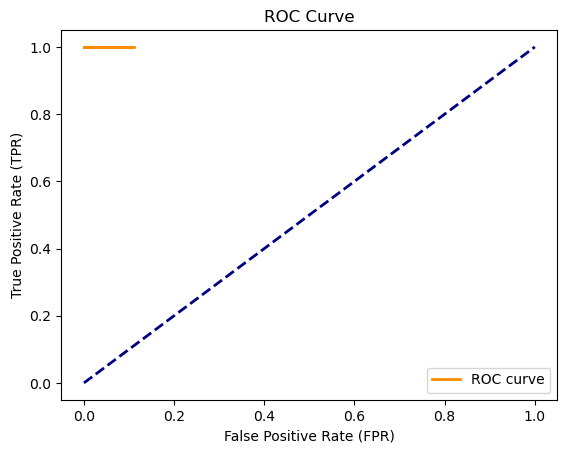

In [51]:
conf_matrix = np.array([
    [5, 0, 0, 0, 0, 0, 0, 0],
    [0, 13, 0, 0, 0, 0, 0, 0],
    [0, 0, 13, 0, 0, 0, 0, 0],
    [0, 0, 0, 9, 0, 0, 0, 0],
    [0, 0, 0, 0, 8, 0, 0, 0],
    [0, 0, 0, 0, 0, 4, 0, 0],
    [0, 0, 0, 0, 0, 0, 6, 0],
    [0, 0, 0, 0, 1, 0, 0, 0]
])

# True Positive Rate (TPR) and False Positive Rate (FPR)
tpr = np.diag(c) / np.sum(conf_matrix, axis=1)
fpr = (np.sum(conf_matrix, axis=0) - np.diag(conf_matrix)) / np.sum(conf_matrix, axis=0)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [52]:
param_grid = {
    'penalty' : ['l1','l2'],
    'C' : [0.1, 0.5, 1, 5 ,10]
}

In [53]:
grid_search = GridSearchCV(estimator = log, param_grid = param_grid, cv = 5)

In [54]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [55]:
best_param = grid_search.best_params_
best_model = grid_search.best_estimator_

In [56]:
y_pred = best_model.predict(x_test)

In [57]:
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy :', acc)

Accuracy : 0.9830508474576272


In [58]:
num_classes = 8

y_true = np.repeat(np.arange(num_classes), conf_matrix.sum(axis=1))

y_pred = np.repeat(np.arange(num_classes), conf_matrix.sum(axis=0))

y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))

y_pred_bin = label_binarize(y_pred, classes=np.arange(num_classes))

roc_auc = roc_auc_score(y_true_bin, y_pred_bin, multi_class='ovr')

print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: 0.9079172342178724


In [59]:
grid_search.best_params_

{'C': 0.1, 'penalty': 'l2'}

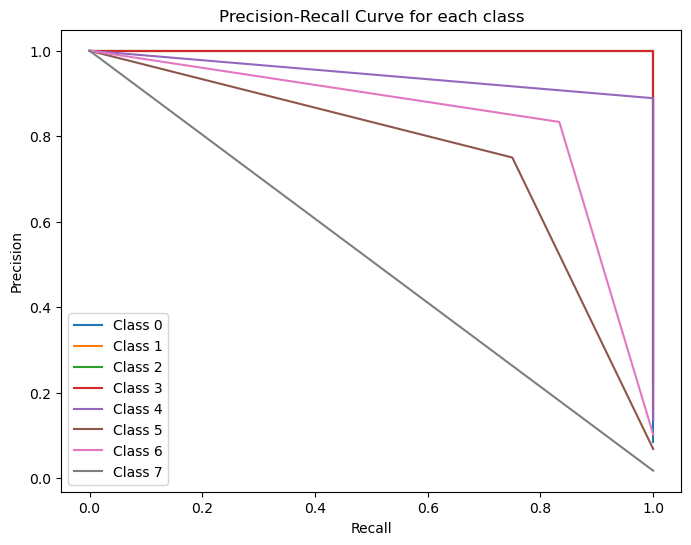

In [60]:
num_classes = 8

y_true = np.repeat(np.arange(num_classes), conf_matrix.sum(axis=1))

y_pred = np.repeat(np.arange(num_classes), conf_matrix.sum(axis=0))

y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))

y_pred_bin = label_binarize(y_pred, classes=np.arange(num_classes))

precision = dict()
recall = dict()
for i in range(num_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_pred_bin[:, i])

plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for each class')
plt.legend(loc='best')
plt.show()

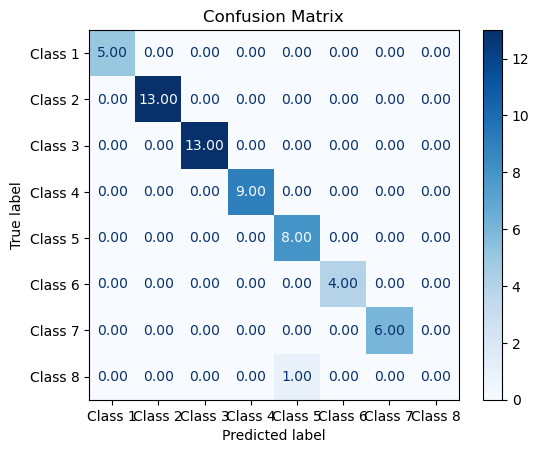

In [61]:
classes = [f'Class {i+1}' for i in range(len(conf_matrix))]

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=classes)
disp.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix')
plt.show()

In [62]:
cv_scores = cross_val_score(log, x, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)

print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))

Cross-Validation Scores: [0.98305085 0.94915254 0.96610169 0.98305085 0.96551724]
Mean CV Score: 0.9693746347165402
Standard Deviation of CV Scores: 0.01271693537716812


# SVM

In [63]:
sc = StandardScaler()

In [64]:
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [65]:
svcm = SVC(kernel = 'linear')

In [66]:
svcm.fit(x_train, y_train)

SVC(kernel='linear')

In [67]:
y_pred = svcm.predict(x_test)

In [68]:
acc = accuracy_score(y_test, y_pred)

In [69]:
print('Accuracy Score : {:.2f}%'.format(acc * 100))

Accuracy Score : 98.31%


In [70]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

        African       1.00      1.00      1.00         5
AfricanAmerican       1.00      1.00      1.00        13
      EastAsian       1.00      1.00      1.00        13
       European       1.00      1.00      1.00         9
        Mexican       0.89      1.00      0.94         8
 NativeAmerican       1.00      1.00      1.00         4
       Oceanian       1.00      1.00      1.00         6
        Unknown       0.00      0.00      0.00         1

       accuracy                           0.98        59
      macro avg       0.86      0.88      0.87        59
   weighted avg       0.97      0.98      0.98        59



In [71]:
print(confusion_matrix(y_test, y_pred))

[[ 5  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0]
 [ 0  0  0  0  8  0  0  0]
 [ 0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  6  0]
 [ 0  0  0  0  1  0  0  0]]


In [72]:
yb = label_binarize(y, classes = [0,1,2,3,4,5,6,7])

In [73]:
classifier = OneVsRestClassifier(SVC(kernel = 'linear', probability = True, random_state = 42))

In [74]:
y_score = classifier.fit(x_train, y_train).decision_function(x_test)

In [75]:
yb1 = yb.shape[1]

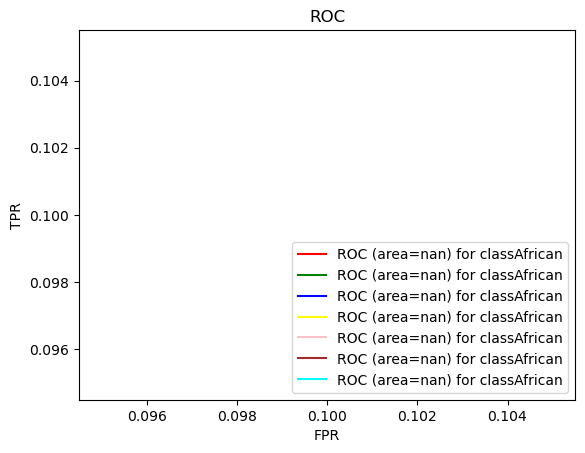

In [76]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(yb1):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
color = ['red','green','blue', 'yellow','pink','brown','cyan']

for i, color in zip(range(yb1), color):
    plt.plot(fpr[i], tpr[i], color = color, label = 'ROC (area={:.2f}) for class{}'.format(roc_auc[i], genetics['Ancestry'][i]))
    
plt.plot([0.1], [0.1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc = 'lower right')
plt.show()

# KNN

In [77]:
k = 3
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [78]:
y_pred = knn_model.predict(x_test)

In [79]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9491525423728814


In [80]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[ 5  0  0  0  0  0  0  0]
 [ 0 12  0  0  1  0  0  0]
 [ 0  0 13  0  0  0  0  0]
 [ 0  0  0  8  0  1  0  0]
 [ 0  0  0  0  8  0  0  0]
 [ 0  0  0  0  0  4  0  0]
 [ 0  0  0  0  0  0  6  0]
 [ 0  0  0  0  1  0  0  0]]


In [81]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

        African       1.00      1.00      1.00         5
AfricanAmerican       1.00      0.92      0.96        13
      EastAsian       1.00      1.00      1.00        13
       European       1.00      0.89      0.94         9
        Mexican       0.80      1.00      0.89         8
 NativeAmerican       0.80      1.00      0.89         4
       Oceanian       1.00      1.00      1.00         6
        Unknown       0.00      0.00      0.00         1

       accuracy                           0.95        59
      macro avg       0.82      0.85      0.83        59
   weighted avg       0.94      0.95      0.94        59



# Naive Bayes

In [82]:
model = GaussianNB()

In [83]:
model.fit(x_train, y_train)

GaussianNB()

In [84]:
predictions = model.predict(x_test)

In [85]:
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy :', acc)

Accuracy : 0.9491525423728814
